1. Cities in Sweden - create dataset (*)
Create this DataFrame from scratch:

Kommun	Population
0	Malmö	347949
1	Stockholm	975551
2	Uppsala	233839
3	Göteborg	583056
  a) Use your DataFrame to print out all the cities. (*)

  b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

  c) Sort the cities by population from largest to smallest. (*)

  d) Filter out the three largest cities. (*)

  e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [5]:
import pandas as pd

kommun = pd.Series(["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series([347949, 975551, 233839, 583056])

df_cities = pd.DataFrame({"Kommun": kommun, "Population": population})
df_cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [65]:
# skapa en DataFrame genom dictionary (keys:value);

df_dictionary = {"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population": [347949, 975551, 233839, 583056]}
df_dictionary = pd.DataFrame(data=df_dictionary)
df_dictionary

# smartare/lättare sätt att göra det på?

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


# a) 
Use your DataFrame to print out all the cities. (*)

In [14]:
df_cities["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

# b) 
Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

In [47]:
# retunerar True eller False, beroende på ifall raden har "Göteborg" i sig. Måste vara exakt.
# dvs. går inte att skriva:
#   df_cities["Kommun"] == "a"
# och få ut något. Denna letar efter en rad som är exakt '==' lika med 'Göteborg'

df_cities["Kommun"] == "Göteborg"

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool

In [44]:
df_cities[df_cities["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [22]:
# Ett annat sätt att göra uppgiften på. Detta är inte "korrekt" då jag inte har använt mig av "Göteborg".
# Här accessar jag istället raden som "Göteborg" ligger på, dvs. rad 3 med hjälp av '.loc'.
# Förstår inte skillnaden just nu mellan '.loc' och '.iloc'.

df_cities.loc[[3]]
#df_cities.iloc[[3]]

,Kommun,Population
3,Göteborg,583056


# c) 
Sort the cities by population from largest to smallest. (*)

In [39]:
# Skapar en ny variabel, 'df_sorted_descending'.
# använder '.sort_values()' för att sortera 'df_cities'.
# '.sort_values()' tar emot olika argument att sortera efter, str | list
# default är ascending order, alltså lågt -> högt
# sätter ascending=False för att få motsatta.
# '.sort_values()' retunerar en DataFrame. 
df_sorted_descending = df_cities.sort_values(by=["Population"], ascending=False)
df_sorted_descending

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


# d) 
Filter out the three largest cities. (*)

In [41]:
# går att använda '.tail()' på flera olika sätt, kolla dokumentationen.
# i detta exemplet har jag använt den för att filtrera bort dem 3 första raderna, dvs filtrera bort dem tre största komunerna.
df_sorted_descending.tail(-3)

,Kommun,Population
2,Uppsala,233839


# e) 
The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [61]:
# Note: the length of your list should match the length of the index column otherwise it will show an error. 
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

# Skapar en ny kolumn, 'Population %'.
# Genom att ta ["Population"] så kan jag räkna med antalet folkmängd i varje Kommun.
# I detta fallet vill jag ha folkmängden i % genom att dela populationen med den totala populationen i Sverige.
# Multiplicerar med *100 för att få snyggare utskrift samt avrundar '.round(1)' till en decimal. 

df_sorted_descending["Population %"] = (df_cities["Population"] / 10379295*100).round(1)
df_sorted_descending

,Kommun,Population,Population %
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


--- 

# 2. Cities in Sweden - real dataset (*)
Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB.

 ## a) 
  Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as
```
df.head()
df.info()
df.describe()
```

In [138]:
df_totalt = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")
df_totalt.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [ ]:
df_totalt.info()

In [ ]:
df_totalt.describe()

In [ ]:
df_totalt.value_counts()

In [ ]:
df_totalt

# b)
Clean your data so that the head looks like this: (*)
https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb#scrollTo=CpyvpPSC-Irr

In [139]:
# OBS!! Farlig kod. Kör ENBART en gång. Annars kommer den alltid att ta bort index 0-5
df_totalt = df_totalt.drop([0,1,2,3,4,5]) # removes indexes 0-5
df_totalt.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


In [142]:
df_totalt.reset_index(drop=True, inplace=True) # resettar index så att den börjar från 0 istället för 6 som i exemplet ovan.
# columns had no name, or rather 'Unnamned: 0-5'. This code allows me to name the columns.
# Note: With this technique I can't just rename one column, I have to change them all at the same time.
# If i have 6 columns, i need 6 names. Can't do with 5 or 7 etc. 

df_totalt.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
df_totalt

# different way to do it. not certian of how it works. 

# df = df.rename(columns = {"Unnamed: 0": "Rang2020",
#                     "Unnamed: 1": "Rang 2019",
#                     "Unnamed: 2": "Kommun",
#                     "Unnamed: 3": "Folkmängd 2020",
#                     "Unnamed: 4": "Folkmängd 2019",
#                     "Unnamed: 5": "Förändring"}) # rename columns using dict of {old: new}

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


# c) 
 Sort the cities by population from largest to smallest. (*)

In [149]:
df_sort_large_to_small = df_totalt.sort_values(by="Folkmängd 2020", ascending=False)
df_sort_large_to_small.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822


# d) 
 Filter out the five smallest cities. (*)

In [151]:
# Reveals the 5 smallest cities, sorted by decsending order. 
df_exclude_smallest = df_sort_large_to_small.tail(5) # '.tail(5)' gives us the last 5 rows in the DataFrame. Note: this DataFrame is sorted by 'Folkmängd 2020'.
df_exclude_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309
12,290,290.0,Bjurholm,2387,2408.0,-0.872093


# e) 
Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

In [169]:
population2020 = df_totalt["Folkmängd 2020"].sum()
print(f"Swedens population 2020: {population2020}")
population2019 = df_totalt["Folkmängd 2019"].sum()
print(f"Swedens population 2019: {population2019:.0f}")

Swedens population 2020: 10379295
Swedens population 2019: 10327589


In [168]:
# NOTE: dessa bör vara i två olika celler
# Annat sätt att göra det på;
# Den enda skillnaden är ordningen på syntaxen. Jag anser att denna är mer "clean", det är mer uppenbart var som summeras.

pop2020 = sum(df_totalt["Folkmängd 2020"])
pop2019 = sum(df_totalt["Folkmängd 2019"])

# f) 
Plot a bar chart for the five largest cities and the five smallest cities. (*)

In [172]:
# create a DataFrame with 5 largest cities:
df_5_largest = df_sort_large_to_small.head()
df_5_largest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822


In [174]:
# already created a DateFrame with the 5 smallest cities, 'df_exclude_smallest', just want to rename it:
df_5_smallest = df_exclude_smallest
df_5_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309
12,290,290.0,Bjurholm,2387,2408.0,-0.872093


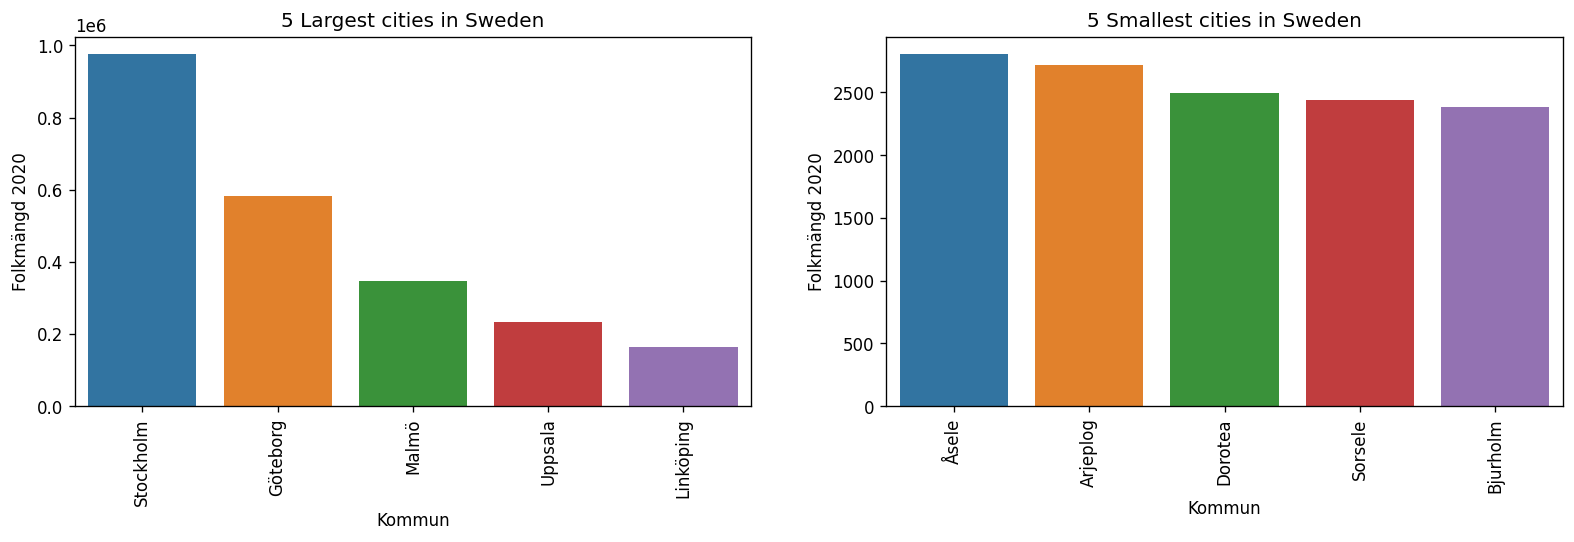

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16,4), dpi=120)
titles = ["5 Largest cities in Sweden", "5 Smallest cities in Sweden"]
data_frames = (df_5_largest, df_5_smallest)
x_columns = ["Kommun", "Kommun"]

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Folkmängd 2020", ax = axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
